# Creating City Points

1. Tijuana
2. Chula Vista
3. Berkeley
4. Tacoma
5. Davis
6. San Leandro

In [15]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

data = pd.DataFrame()

data['cities'] = ['Tijuana', 'Chula Vista', 'Berkeley', 'Tacoma', 'Davis', 'San Leandro', 'Oaxaca']


data['latitude'] = [32.53, 32.64, 37.87, 47.25, 38.54, 37.73, 17.07]
data['longitude'] = [-117.08, -117.08, -122.28, -122.44, -121.74, -122.16, -96.73]

data['coordinates'] = list(zip(data['longitude'], data['latitude']))

data['coordinates'] = data['coordinates'].apply(Point)

data['emoji'] = '❤️'
data['emoji_blue'] = '💙'

gdf = geopandas.GeoDataFrame(data, geometry='coordinates')


In [16]:
gdf.head()

,cities,latitude,longitude,coordinates,emoji,emoji_blue
0,Tijuana,32.53,-117.08,POINT (-117.08 32.53),❤️,💙
1,Chula Vista,32.64,-117.08,POINT (-117.08 32.64),❤️,💙
2,Berkeley,37.87,-122.28,POINT (-122.28 37.87),❤️,💙
3,Tacoma,47.25,-122.44,POINT (-122.44 47.25),❤️,💙
4,Davis,38.54,-121.74,POINT (-121.74 38.54),❤️,💙


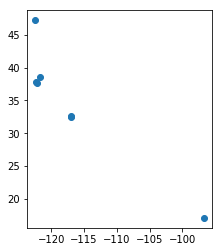

In [17]:
gdf.plot()

In [18]:
gdf.crs = {'init': 'epsg:4326'}

In [19]:
gdf.crs

{'init': 'epsg:4326'}

In [20]:
import json

In [21]:
cities = json.loads(gdf.to_json())

with open("../data/interim/cities.geojson", "w") as file:
    json.dump(cities, file, indent=4)